In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data PreProcessing

In [2]:
import pandas as pd

# df = pd.read_csv('sample_data/the_data_selected.csv', sep=';', encoding='ISO-8859-1')
df = pd.read_csv('sample_data/the_data_selected.csv', sep=',')
my_df = df[['score', 'content']]
my_df.head()

,score,content
0,1,"Setiap apply lamaran disini, bbrpa hari atau b..."
1,3,"min tolong ini ngebug, masa pas mau buka lowon..."
2,2,Worth it
3,1,"Jadi susah re login by seek, gagal terus"
4,1,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...


### Menghitung Jumlah Baris

In [3]:
len(my_df.index)

3000

### Menghapus Baris yang Null

In [4]:
my_df = my_df.dropna(subset=['content'])
my_df.isnull().sum()

score      0
content    0
dtype: int64

### Menghitung Jumlah Baris setelah Null Dihilangkan

In [5]:
len(my_df)

3000

## a. Casefolding

Proses casefolding adalah proses mengubah seluruh huruf menjadi kecil.

In [6]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [7]:
my_df['text_clean'] = my_df['content'].str.lower()

In [8]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,score,content,text_clean
0,1,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...
1,3,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...
2,2,Worth it,worth it
3,1,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus
4,1,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...


## b. Filtering

Filtering Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,score,content,text_clean,text_Stopword
0,1,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...
1,3,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...
2,2,Worth it,worth it,worth it
3,1,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal
4,1,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...


## c. Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [10]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,score,content,text_clean,text_Stopword,text_tokens
0,1,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"[apply, lamaran, bbrpa, bbrpa, minggu, balasan..."
1,3,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"[min, tolong, ngebug, pas, buka, lowongan, mut..."
2,2,Worth it,worth it,worth it,"[worth, it]"
3,1,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"[susah, re, login, by, seek, gagal]"
4,1,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"[tolong, perbaiki, aplikasi, login, eror, gaus..."


## d. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [11]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


5013
------------------------
1 : apply : apply
2 : lamaran : lamar
3 : bbrpa : bbrpa
4 : minggu : minggu
5 : balasan : balas
6 : stiap : stiap
7 : perusaahan : perusaahan
8 : pekerjaan : kerja
9 : kadaluwarsatutup : kadaluwarsatutup
10 : gtu : gtu
11 : beda : beda
12 : apk : apk
13 : lulus : lulus
14 : mkanya : mkanya
15 : jarang : jarang
16 : kali : kali
17 : buka : buka
18 : jobstreet : jobstreet
19 : min : min
20 : tolong : tolong
21 : ngebug : ngebug
22 : pas : pas
23 : lowongan : lowong
24 : muter : muter
25 : si : si
26 : make : make
27 : wifi : wifi
28 : aplikasi : aplikasi
29 : lancar : lancar
30 : udh : udh
31 : masuk : masuk
32 : tetep : tetep
33 : gabisa : gabisa
34 : ngalamar : ngalamar
35 : worth : worth
36 : it : it
37 : susah : susah
38 : re : re
39 : login : login
40 : by : by
41 : seek : seek
42 : gagal : gagal
43 : perbaiki : baik
44 : eror : eror
45 : gausah : gausah
46 : suruh : suruh
47 : screenshotan : screenshotan
48 : kasih : kasih
49 : buktii : bukti
50 : gaad

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,1,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"[apply, lamaran, bbrpa, bbrpa, minggu, balasan...",apply lamar bbrpa bbrpa minggu balas stiap per...
1,3,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"[min, tolong, ngebug, pas, buka, lowongan, mut...",min tolong ngebug pas buka lowong muter muter ...
2,2,Worth it,worth it,worth it,"[worth, it]",worth it
3,1,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"[susah, re, login, by, seek, gagal]",susah re login by seek gagal
4,1,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"[tolong, perbaiki, aplikasi, login, eror, gaus...",tolong baik aplikasi login eror gausah suruh s...
5,3,Masa tiap 3 hari sekali log out terus Uda masu...,masa tiap 3 hari sekali log out terus uda masu...,3 log out uda masukin data bener kesalahan moh...,"[3, log, out, uda, masukin, data, bener, kesal...",3 log out uda masukin data bener salah mohon b...
6,3,ga jls apk nya baru sebentar buka udh load lam...,ga jls apk nya baru sebentar buka udh load lam...,ga jls apk nya sebentar buka udh load bgt pdhl...,"[ga, jls, apk, nya, sebentar, buka, udh, load,...",ga jls apk nya sebentar buka udh load bgt pdhl...
7,3,Susah banget buat masuk aplikasinya selalu men...,susah banget buat masuk aplikasinya selalu men...,susah banget masuk aplikasinya mentok sinyal k...,"[susah, banget, masuk, aplikasinya, mentok, si...",susah banget masuk aplikasi mentok sinyal kenceng
8,5,Excellent,excellent,excellent,[excellent],excellent
9,5,Good job,good job,good job,"[good, job]",good job


In [14]:
data_clean.to_csv('sample_data/the_data_hasiltextpreprocessing.csv', index=False)

# Data Labelling

In [15]:
def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df = my_df.dropna()

my_df.to_csv('sample_data/the_data_hasillabeling.csv', index=False)

my_df.head()

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,1,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"[apply, lamaran, bbrpa, bbrpa, minggu, balasan...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif
2,2,Worth it,worth it,worth it,"[worth, it]",worth it,negatif
3,1,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"[susah, re, login, by, seek, gagal]",susah re login by seek gagal,negatif
4,1,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"[tolong, perbaiki, aplikasi, login, eror, gaus...",tolong baik aplikasi login eror gausah suruh s...,negatif
8,5,Excellent,excellent,excellent,[excellent],excellent,positif


### Menampilkan isi Data Hasil Labelling

In [16]:
import pandas as pd
hasillabeling = pd.read_csv('sample_data/the_data_hasillabeling.csv')
pd.set_option('display.max_colwidth', None)
hasillabeling[['content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed', 'Label']].head(6)

,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",setiap apply lamaran disini bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama pekerjaan sebagai telah kadaluwarsatutup semua gtu beda sama apk kita lulus mkanya jarang kali buka jobstreet,apply lamaran bbrpa bbrpa minggu balasan stiap perusaahan pekerjaan kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu', 'balasan', 'stiap', 'perusaahan', 'pekerjaan', 'kadaluwarsatutup', 'gtu', 'beda', 'apk', 'lulus', 'mkanya', 'jarang', 'kali', 'buka', 'jobstreet']",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif
1,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif
2,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong di perbaiki masalah yang ada di aplikasi untuk login yang eror gausah suruh screenshotan di kasih buktii juga gaadaa perbaikann,tolong perbaiki aplikasi login eror gausah suruh screenshotan kasih buktii gaadaa perbaikann,"['tolong', 'perbaiki', 'aplikasi', 'login', 'eror', 'gausah', 'suruh', 'screenshotan', 'kasih', 'buktii', 'gaadaa', 'perbaikann']",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif
4,Excellent,excellent,excellent,['excellent'],excellent,positif
5,Good job,good job,good job,"['good', 'job']",good job,positif


### Jumlah Label Aktual

In [17]:
len(hasillabeling)

2753

### Jumlah Label Mentah Positif dan Presentase

In [18]:
positive_count = hasillabeling[hasillabeling['Label'] == 'positif'].shape[0]
print(positive_count)

1505


In [19]:
total_count = len(hasillabeling)
positive_percentage = (positive_count / total_count) * 100
print(f"Percentage of positive reviews: {positive_percentage:.2f}%")

Percentage of positive reviews: 54.67%


### Jumlah Label Mentah Negatif dan Presentase

In [20]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
print(negative_count)

1248


In [21]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
negative_percentage = (negative_count / total_count) * 100
print(f"Percentage of negative reviews: {negative_percentage:.2f}%")

Percentage of negative reviews: 45.33%


# Data Extracting

In [22]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Drop Kolom yang Tidak Digunakan

In [23]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

### Menampilkan Jumlah Data Hasil Extracting

In [25]:
print(A.shape)
print(A_tfid.shape)

(2753,)
(2753, 3937)


### Konversi Data Hasil Extracting ke Array

In [26]:
A_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Penerapan Algoritma

## a. Naive Bayes

### 1. Cara Konvensional

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [28]:
B_pred = nb.predict(A_tfid)
data_clean['Label NB'] = B_pred
data_clean = pd.DataFrame(data_clean)
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB.csv', index=False)

data_clean.head()

,content,text_tokens_stemmed,Label,Label NB
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif,negatif
1,Worth it,worth it,negatif,negatif
2,"Jadi susah re login by seek, gagal terus",susah re login by seek gagal,negatif,negatif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif,negatif
4,Excellent,excellent,positif,positif


### 2. Cara Pakai 5K-Fold Cross Validation

In [29]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
model = MultinomialNB()

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label NB Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_NB_average.csv', index=False)


Fold Accuracies: [0.8911070780399274, 0.8911070780399274, 0.852994555353902, 0.88, 0.8872727272727273]
Mean Accuracy: 0.8804962877412968
Standard Deviation of Accuracy: 0.014336592761714352
Overall Accuracy with Average Predictions: 0.8804940065383219


## b. Support Vector Machine (SVM)

### 1. Cara Konvensional

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

Accuracy for C=0.01: 0.887032328369052
Accuracy for C=0.05: 0.9171812568107519
Accuracy for C=0.25: 0.9505993461678169
Accuracy for C=0.5: 0.966581910642935
Accuracy for C=0.75: 0.974573192880494
Accuracy for C=1: 0.9785688339992735


LinearSVC(C=1)

In [31]:
B_pred = svm.predict(A_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('sample_data/the_data_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif,negatif,negatif,negatif
1,Worth it,worth it,negatif,negatif,positif,negatif
2,"Jadi susah re login by seek, gagal terus",susah re login by seek gagal,negatif,negatif,negatif,negatif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif,negatif,negatif,negatif
4,Excellent,excellent,positif,positif,positif,positif


### 2. Cara Pakai 5K-Fold Cross Validation

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label SVM Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_SVM_average.csv', index=False)


Fold Accuracies: [0.8765880217785844, 0.8784029038112523, 0.8638838475499092, 0.8654545454545455, 0.8581818181818182]
Mean Accuracy: 0.8685022273552219
Standard Deviation of Accuracy: 0.007752833136914297
Overall Accuracy with Average Predictions: 0.8685070831819833


In [33]:
data_clean.to_csv('sample_data/the_data_hasil_NB_dan_SVM.csv', index=False)

# Evaluasi Model

In [34]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Menampilkan 5 baris data_clean

In [35]:
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif,negatif,negatif,negatif,negatif
1,Worth it,worth it,negatif,negatif,positif,negatif,positif
2,"Jadi susah re login by seek, gagal terus",susah re login by seek gagal,negatif,negatif,negatif,negatif,negatif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif,negatif,negatif,negatif,positif
4,Excellent,excellent,positif,positif,positif,positif,positif


### Menghitung Jumlah Baris data_clean

In [36]:
len(data_clean)

2753

### Setup TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

## a1. k-fold Cross Validation NB

In [38]:
# a1. k-fold Cross Validation NB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")


Akurasi setiap fold: [0.88566243 0.88203267 0.8784029  0.84545455 0.90727273]
Rata-rata akurasi: 0.8797650552714075
Standar deviasi: 0.019877925837202944
Akurasi tertinggi: 0.9072727272727272
Akurasi terendah: 0.8454545454545455
Waktu eksekusi: 0.8797650552714075


## a2. k-fold Cross Validation SVM

In [39]:
# a2. k-fold Cross Validation SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

Accuracy for C=0.01: 0.887032328369052
Accuracy for C=0.05: 0.9171812568107519
Accuracy for C=0.25: 0.9505993461678169
Accuracy for C=0.5: 0.966581910642935
Accuracy for C=0.75: 0.974573192880494
Accuracy for C=1: 0.9785688339992735
Akurasi setiap fold: [0.87114338 0.85480944 0.86206897 0.83272727 0.86909091]
Rata-rata akurasi: 0.8579679920805148
Standar deviasi: 0.013865052327211115
Akurasi tertinggi: 0.8711433756805808
Akurasi terendah: 0.8327272727272728
Waktu eksekusi: 0.8579679920805148


## b1. Metriks NB

In [40]:
# b1. Metriks NB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.9324373410824555
Precision score: 0.933879008632945
Recall score: 0.9324373410824555
F1 score: 0.932554572062836
confusion matrix:
[[1190   58]
 [ 128 1377]]

              precision    recall  f1-score   support

     negatif       0.90      0.95      0.93      1248
     positif       0.96      0.91      0.94      1505

    accuracy                           0.93      2753
   macro avg       0.93      0.93      0.93      2753
weighted avg       0.93      0.93      0.93      2753



## b2. Metriks SVM

In [41]:
# b2. Metriks SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Accuracy score: 0.9785688339992735
Precision score: 0.9786157251817189
Recall score: 0.9785688339992735
F1 score: 0.9785765473449131
confusion matrix:
[[1224   24]
 [  35 1470]]

              precision    recall  f1-score   support

     negatif       0.97      0.98      0.98      1248
     positif       0.98      0.98      0.98      1505

    accuracy                           0.98      2753
   macro avg       0.98      0.98      0.98      2753
weighted avg       0.98      0.98      0.98      2753



# Analisis dan Perbandingan Hasil

## a. Perbandingan Akurasi

In [42]:
print(f"Rata-rata akurasi NB (K-Fold Cross Validation): {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Rata-rata akurasi SVM (K-Fold Cross Validation): {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

# Metriks NB
print("")
print("Metriks NB")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

# Metriks SVM
print("")
print("Metriks SVM")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Rata-rata akurasi NB (K-Fold Cross Validation): 0.8797650552714075
Rata-rata akurasi SVM (K-Fold Cross Validation): 0.8579679920805148

Metriks NB
Accuracy score: 0.9324373410824555
Precision score: 0.933879008632945
Recall score: 0.9324373410824555
F1 score: 0.932554572062836
confusion matrix:
[[1190   58]
 [ 128 1377]]

              precision    recall  f1-score   support

     negatif       0.90      0.95      0.93      1248
     positif       0.96      0.91      0.94      1505

    accuracy                           0.93      2753
   macro avg       0.93      0.93      0.93      2753
weighted avg       0.93      0.93      0.93      2753


Metriks SVM
Accuracy score: 0.9785688339992735
Precision score: 0.9786157251817189
Recall score: 0.9785688339992735
F1 score: 0.9785765473449131
confusion matrix:
[[1224   24]
 [  35 1470]]

              precision    recall  f1-score   support

     negatif       0.97      0.98      0.98      1248
     positif       0.98      0.98      0.98     

## b. Interpretasi Hasil

Berikut adalah interpretasi hasil yang dapat dijelaskan berdasarkan data yang diberikan:

1. Analisis Performa Naive Bayes (NB)
Naive Bayes adalah algoritma berbasis probabilitas yang mengasumsikan bahwa setiap fitur bersifat independen. Karena asumsi ini, NB bekerja sangat baik pada dataset yang memiliki fitur sederhana dan distribusi data yang sesuai dengan asumsi independensi.

Akurasi rata-rata: 0.8797 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9324), menunjukkan kinerja yang cukup stabil.
Confusion Matrix:
False Positive (FP): 58 ulasan negatif salah diklasifikasikan sebagai negatif.
False Negative (FN): 128 ulasan negatif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.96, artinya model mampu memprediksi ulasan positif dengan baik, meskipun ada beberapa kesalahan.
Recall (Negatif): 0.95, menunjukkan bahwa sebagian besar ulasan negatif terdeteksi dengan benar.
Kelemahan NB
Asumsi independensi antar fitur bisa menjadi terlalu sederhana, terutama jika fitur ulasan memiliki korelasi yang tinggi.
Rentan terhadap misclassifikasi, 
Misclassifikasi adalah kesalahan dalam pengklasifikasian data, yaitu ketika model prediksi salah menentukan label suatu data. Contohnya:

False Positive (FP): Data negatif diprediksi sebagai positif.
False Negative (FN): Data positif diprediksi sebagai negatif.
Ini mencerminkan ketidakakuratan model dalam memisahkan kelas dengan benar.

Kelebihan NB
Algoritma yang cepat dan efisien, terutama untuk dataset besar.
Sangat cocok untuk data teks, seperti ulasan, karena bekerja dengan representasi berbasis frekuensi seperti bag-of-words atau TF-IDF.
Namun, pada kasus ini, akurasi rata-rata NB lebih rendah dibandingkan SVM. Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya berlaku, sehingga NB kehilangan sensitivitas terhadap pola-pola kompleks dalam ulasan.

2. Analisis Performa Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang bekerja dengan cara mencari hyperplane terbaik untuk memisahkan data ke dalam kelas-kelas yang berbeda. SVM dikenal sangat baik dalam menangani data berdimensi tinggi dan non-linear, terutama dengan kernel yang sesuai.

Akurasi rata-rata: 0.8579 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9785), menunjukkan performa yang baik secara konsisten.
Confusion Matrix:
False Positive (FP): 24 ulasan negatif salah diklasifikasikan sebagai positif.
False Negative (FN): 35 ulasan positif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.98, menunjukkan model sangat andal dalam memprediksi ulasan positif.
Recall (Negatif): 0.98, artinya sebagian besar ulasan negatif teridentifikasi dengan benar.
Kelebihan SVM
SVM lebih robust terhadap pola-pola yang kompleks karena menggunakan margin optimal untuk memisahkan data.
Lebih tahan terhadap overfitting, terutama ketika kernel yang digunakan sesuai.
Kelemahan SVM
Proses pelatihan lebih lama dibandingkan NB, terutama pada dataset besar.
Kurang cocok jika data memiliki banyak noise atau tidak terpisahkan secara linear.

3. Perbandingan Akurasi
Perbedaan rata-rata akurasi antara NB (0.8797) dan SVM (0.8579) pada K-Fold Cross Validation cukup kecil, tetapi pada data uji, akurasi SVM (0.9785) jauh lebih tinggi dibandingkan NB (0.9324). Hal ini menunjukkan bahwa SVM mampu memanfaatkan pola-pola yang lebih kompleks dalam ulasan, sehingga memberikan hasil yang lebih akurat.

Mengapa SVM Lebih Akurat?

Kemampuan menangkap pola kompleks: SVM menggunakan hyperplane untuk memisahkan kelas yang mungkin tidak linear, sementara NB hanya menggunakan probabilitas berdasarkan fitur independen.
Penanganan outlier: Margin SVM yang optimal membantu mengurangi pengaruh data outlier, sedangkan NB lebih rentan terhadap kesalahan ini.
Penggunaan kernel: Jika kernel yang digunakan sesuai (seperti RBF atau linear), SVM dapat bekerja sangat baik pada data yang tidak terdistribusi secara normal.
Mengapa NB Masih Kompetitif?

Meski akurasinya lebih rendah, NB tetap memberikan hasil yang cepat dan efisien karena kesederhanaannya.
NB memiliki trade-off performa yang baik, terutama jika dataset tidak memiliki pola kompleks atau berisi banyak noise.


# Kesimpulan

Naive Bayes bekerja baik untuk ulasan yang memiliki pola sederhana dan independen antar fitur. Namun, asumsi independensi fitur membuatnya kalah performa dibandingkan SVM pada data ulasan ini.
SVM lebih unggul karena mampu menangkap pola kompleks antar fitur dan lebih robust terhadap outlier. Namun, ini datang dengan biaya komputasi yang lebih tinggi.
Perbedaan Akurasi:
Perbedaan akurasi mungkin muncul karena NB kesulitan menangani korelasi antar fitur dalam ulasan, sementara SVM dapat memisahkan kelas secara lebih presisi.

### Menampilkan 5 baris my_df

In [43]:
my_df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
my_df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif,negatif,negatif,negatif,negatif
1,Worth it,worth it,negatif,negatif,positif,negatif,positif
2,"Jadi susah re login by seek, gagal terus",susah re login by seek gagal,negatif,negatif,negatif,negatif,negatif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif,negatif,negatif,negatif,positif
4,Excellent,excellent,positif,positif,positif,positif,positif


### Memberikan Informasi my_df

In [44]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2753 entries, 0 to 2752
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              2753 non-null   object
 1   text_tokens_stemmed  2723 non-null   object
 2   Label                2753 non-null   object
 3   Label NB             2753 non-null   object
 4   Label NB Average     2753 non-null   object
 5   Label SVM            2753 non-null   object
 6   Label SVM Average    2753 non-null   object
dtypes: object(7)
memory usage: 150.7+ KB


### Mengecek Missing Value

In [45]:
my_df.isna()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2748,False,False,False,False,False,False,False
2749,False,False,False,False,False,False,False
2750,False,False,False,False,False,False,False
2751,False,False,False,False,False,False,False


In [46]:
my_df.isna().any()

content                False
text_tokens_stemmed     True
Label                  False
Label NB               False
Label NB Average       False
Label SVM              False
Label SVM Average      False
dtype: bool

### Mendeskripsikan my_df

In [47]:
my_df.describe()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
count,2753,2723,2753,2753,2753,2753,2753
unique,2390,2231,2,2,2,2,2
top,Good,good,positif,positif,positif,positif,positif
freq,76,90,1505,1435,1446,1494,1473


### Menghitung Jumlah Baris yang memiliki NULL

In [48]:
my_df.isnull().sum()

content                 0
text_tokens_stemmed    30
Label                   0
Label NB                0
Label NB Average        0
Label SVM               0
Label SVM Average       0
dtype: int64

# Visualization

In [49]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif,negatif,negatif,negatif,negatif
1,Worth it,worth it,negatif,negatif,positif,negatif,positif
2,"Jadi susah re login by seek, gagal terus",susah re login by seek gagal,negatif,negatif,negatif,negatif,negatif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif,negatif,negatif,negatif,positif
4,Excellent,excellent,positif,positif,positif,positif,positif


### Menghitung Jumlah Baris df

In [50]:
len(df)

2753

## Wordcloud Klasifikasi Sentimen Semua

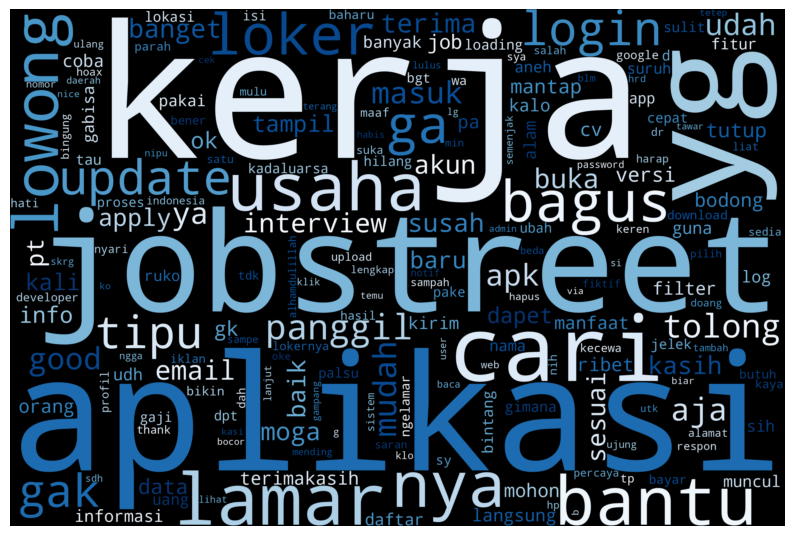

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in df['text_tokens_stemmed'].fillna('')])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Positif NB

### 1. Naive Bayes

#### Menghitung Jumlah Baris Positif

In [52]:
df[df['Label NB Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
1,Worth it,worth it,negatif,negatif,positif,negatif,positif
4,Excellent,excellent,positif,positif,positif,positif,positif
5,Good job,good job,positif,positif,positif,positif,positif
7,Ok google scatter superwin+jp,ok google scatter superwinjp,positif,positif,positif,positif,positif
9,Good,good,positif,positif,positif,positif,positif


#### Penerapan Wordcloud

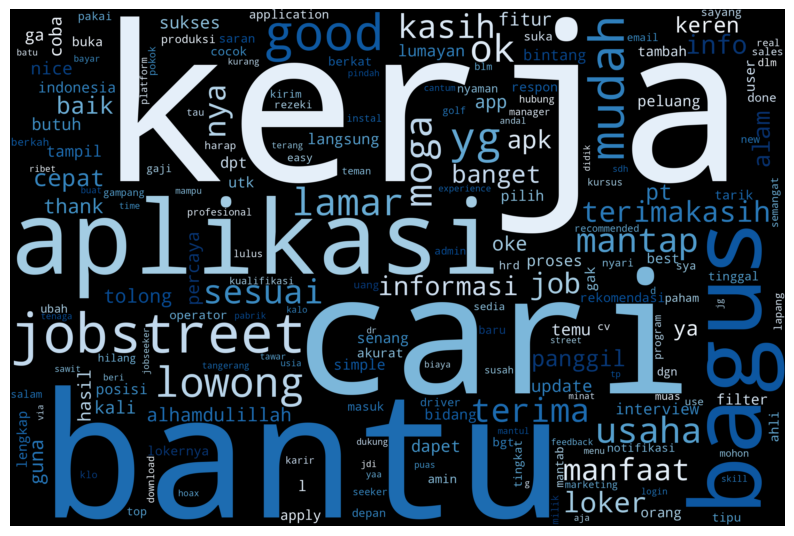

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NB Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Positif

In [54]:
df[df['Label SVM Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
1,Worth it,worth it,negatif,negatif,positif,negatif,positif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif,negatif,negatif,negatif,positif
4,Excellent,excellent,positif,positif,positif,positif,positif
5,Good job,good job,positif,positif,positif,positif,positif
7,Ok google scatter superwin+jp,ok google scatter superwinjp,positif,positif,positif,positif,positif


#### Penerapan Wordcloud

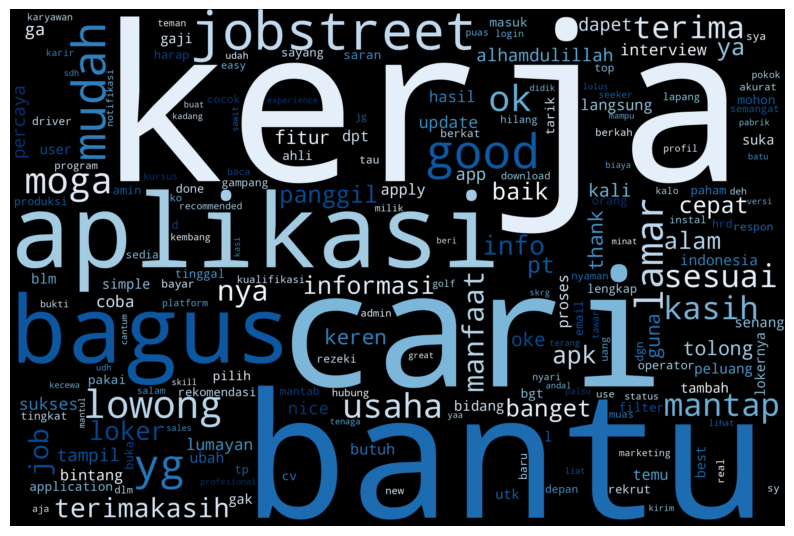

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Negatif

### 1. Naive Bayes

#### Menghitung Jumlah Baris Negatif

In [56]:
df[df['Label NB Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif,negatif,negatif,negatif,negatif
2,"Jadi susah re login by seek, gagal terus",susah re login by seek gagal,negatif,negatif,negatif,negatif,negatif
3,"TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKASI UNTUK LOGIN YANG EROR!! GAUSAH SURUH SCREENSHOT""AN DI KASIH BUKTII JUGA GAADAA PERBAIKANN!!!",tolong baik aplikasi login eror gausah suruh screenshotan kasih bukti gaadaa perbaikann,negatif,negatif,negatif,negatif,positif
6,"Ribet persyaratan, baru lulus ditanya pengalaman kerja, kan bloon, udah punya pengalaman tanya usia tidak masuk sleksi terlalu tua sedikit, maunya apa setan.",ribet syarat lulus alam kerja bloon udah alam usia masuk sleksi tua mau setan,negatif,negatif,negatif,negatif,negatif
8,Burukkk jangan download soalnya login gak bisa,burukkk download login gak,negatif,negatif,negatif,negatif,negatif


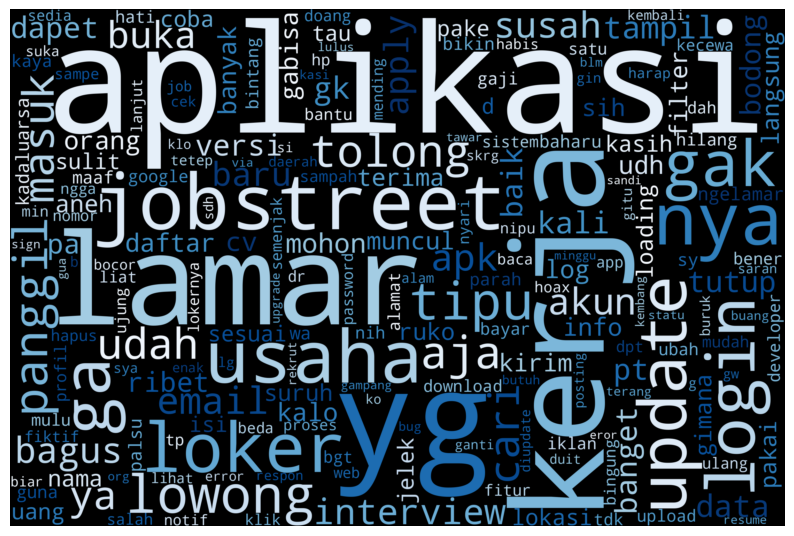

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NB Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Negatif

In [58]:
df[df['Label SVM Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,"Setiap apply lamaran disini, bbrpa hari atau bbrpa minggu kemudian balasan stiap perusaahan sama, pekerjaan sebagai ""...."" telah kadaluwarsa/Tutup, semua gtu.. Beda sama apk Kita Lulus, mkanya jarang kali buka Jobstreet",apply lamar bbrpa bbrpa minggu balas stiap perusaahan kerja kadaluwarsatutup gtu beda apk lulus mkanya jarang kali buka jobstreet,negatif,negatif,negatif,negatif,negatif
2,"Jadi susah re login by seek, gagal terus",susah re login by seek gagal,negatif,negatif,negatif,negatif,negatif
6,"Ribet persyaratan, baru lulus ditanya pengalaman kerja, kan bloon, udah punya pengalaman tanya usia tidak masuk sleksi terlalu tua sedikit, maunya apa setan.",ribet syarat lulus alam kerja bloon udah alam usia masuk sleksi tua mau setan,negatif,negatif,negatif,negatif,negatif
8,Burukkk jangan download soalnya login gak bisa,burukkk download login gak,negatif,negatif,negatif,negatif,negatif
10,udah beberapa kali download tetep gabisa login terus,udah kali download tetep gabisa login,negatif,negatif,negatif,negatif,negatif


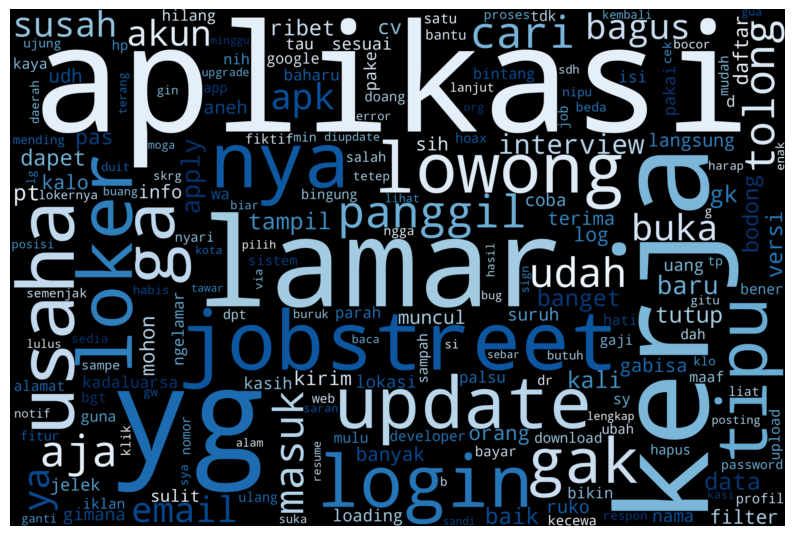

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)